In [1]:
import requests
import base64
import json
from copy import deepcopy

In [2]:
payload_template = {'alwayson_scripts': {'API payload': {'args': []},
  'Comments': {'args': []},
  'ControlNet': {'args': [{'advanced_weighting': None,
     'batch_images': '',
     'control_mode': 'Balanced',
     'enabled': True,
     'guidance_end': 1,
     'guidance_start': 0,
     'hr_option': 'Both',
     'image': {'image': 'base64image placeholder', 'mask': None},
     'inpaint_crop_input_image': False,
     'input_mode': 'simple',
     'is_ui': True,
     'loopback': False,
     'low_vram': False,
     'model': 'ip-adapter-plus-face_sdxl_vit-h [c60d7d48]',
     'module': 'ip-adapter-auto',
     'output_dir': '',
     'pixel_perfect': True,
     'processor_res': 1024,
     'resize_mode': 'Crop and Resize',
     'save_detected_map': True,
     'threshold_a': -1,
     'threshold_b': -1,
     'weight': 0.5}]},
  'Extra options': {'args': []},
  'Hypertile': {'args': []},
  'Refiner': {'args': [False, '', 0.8]},
  'Seed': {'args': [-1, False, -1, 0, 0, 0]}},
 'batch_size': 1,
 'cfg_scale': 7,
 'comments': {},
 'denoising_strength': 0.7,
 'disable_extra_networks': False,
 'do_not_save_grid': False,
 'do_not_save_samples': False,
 'enable_hr': False,
 'height': 1024,
 'hr_negative_prompt': '',
 'hr_prompt': '',
 'hr_resize_x': 0,
 'hr_resize_y': 0,
 'hr_scale': 2,
 'hr_second_pass_steps': 0,
 'hr_upscaler': 'Latent',
 'n_iter': 1,
 'negative_prompt': 'disfigured, ugly, bad, immature, cartoon, anime, 3d, painting, b&w, monochrome, low-res, bad anatomy, worst quality, low quality\n',
 'override_settings': {},
 'override_settings_restore_afterwards': True,
 'prompt': 'photo, man at the workbench, hands dirty, tired, realistic, uploaded to snapchat',
 'restore_faces': False,
 's_churn': 0,
 's_min_uncond': 0,
 's_noise': 1,
 's_tmax': None,
 's_tmin': 0,
 'sampler_name': 'DPM++ 2M Karras',
 'script_args': [],
 'script_name': None,
 'seed': -1,
 'seed_enable_extras': True,
 'seed_resize_from_h': -1,
 'seed_resize_from_w': -1,
 'steps': 20,
 'styles': [],
 'subseed': -1,
 'subseed_strength': 0,
 'tiling': False,
 'width': 1024}

In [3]:
with open("images/faces/1.png", 'rb') as f:
    ref_img = f.read()

payload = deepcopy(payload_template)
payload["alwayson_scripts"]["ControlNet"]["args"][0]["image"]["image"] = base64.b64encode(ref_img).decode('utf-8')

In [9]:
r = requests.post("http://127.0.0.1:7860/sdapi/v1/txt2img", json=payload)
r

<Response [200]>

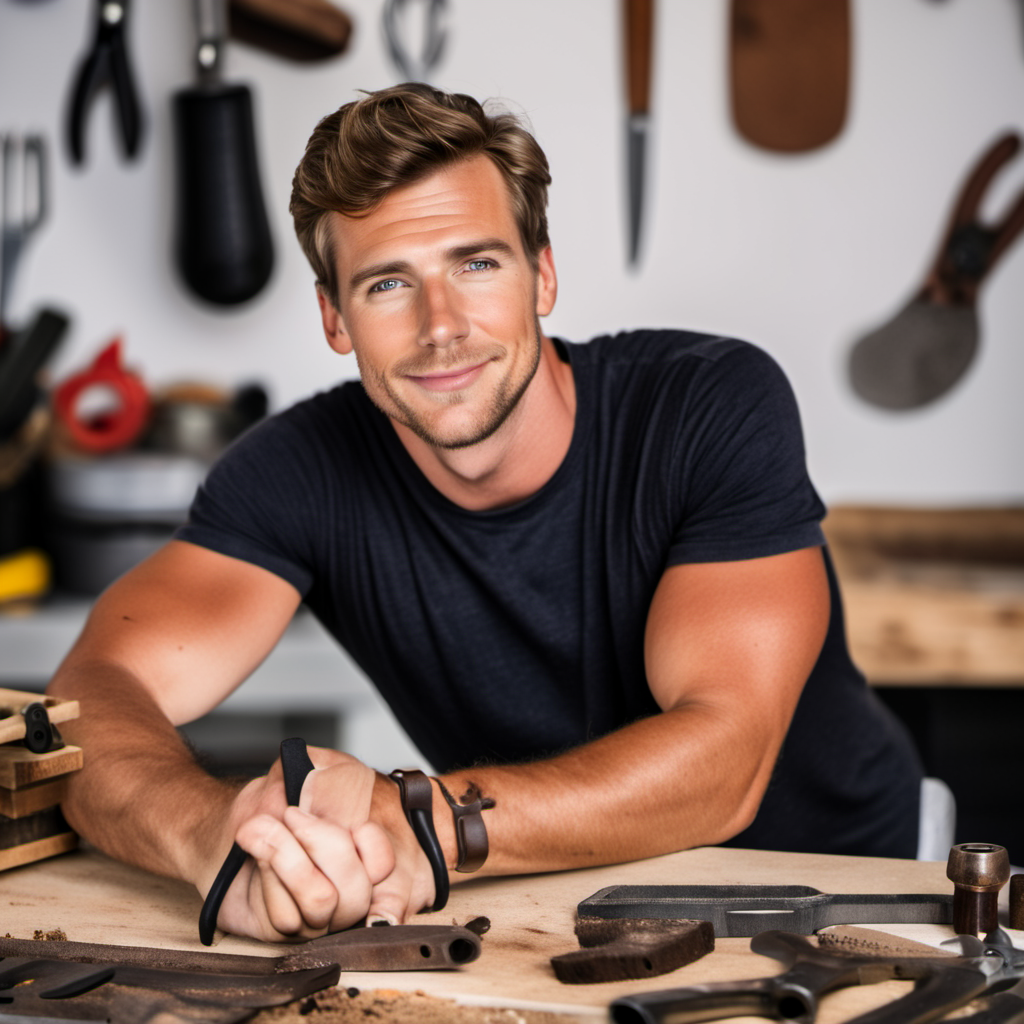

In [10]:
from PIL import Image
import io

image_file = io.BytesIO(base64.b64decode(r.json()['images'][0]))
image = Image.open(image_file)
image

In [ ]:
with open("output.png", 'wb') as f:
    f.write(base64.b64decode(r.json()['images'][0]))